# Import & function

In [42]:
from PIL import Image, ImageDraw

import os
import numpy as np
import math

# Convert to grayscale & cut

In [25]:
display_resolution = 1920/1080 # stim presentation display resolution
screenshot_resolution = 1517/854 # measured by snipaste (grid on)
print(display_resolution), print(screenshot_resolution)
print(display_resolution - screenshot_resolution) # aspect ratio error 0.1%

grating_radius_screenshot = 440 # grating radius pixel in screenshot
print(grating_radius_screenshot / 854 * 1080), print(grating_radius_screenshot / 1517 * 1920)
grating_radius = math.ceil(np.max([grating_radius_screenshot / 854 * 1080, 
                                grating_radius_screenshot / 1517 * 1920])) # estimations are similar
grating_radius # this should also be the radius of natural image cropped to squares

1.7777777777777777
1.7763466042154568
0.0014311735623209199
556.440281030445
556.8885959129861


557

In [51]:
def crop(input_path, input_img, chunk_height, chunk_width, save_path):

    if input_path[-1] != "/": input_path = input_path + "/"
    if save_path[-1] != "/": save_path = save_path + "/" # input_path & save_path must end with slash
    input_full = input_path + input_img
    
    im = Image.open(input_full).convert('L') # convert to grayscale
    img_width, img_height = im.size
#     print(img_width), print(img_height)
    
    k = 0
    for i in range(0, img_height-chunk_height, chunk_height):
        for j in range(0, img_width-chunk_width, chunk_width):
            
            box = (j, i, j+chunk_width, i+chunk_height)
            chunk = im.crop(box) # cut into square piece
            
            lum_img = Image.new('L', [chunk_height, chunk_width] , 0)
            draw = ImageDraw.Draw(lum_img)
            draw.pieslice([(0,0), (chunk_height, chunk_width)], 0, 360, 
                          fill = 255, outline = "white")
            chunk_arr =np.array(chunk)
            lum_img_arr =np.array(lum_img)
            chunk_circle = np.dstack((chunk_arr,lum_img_arr)) # cut square into circle
            chunk_circle = Image.fromarray(chunk_circle)
#             display(chunk_circle)
            
            chunk_circle.save(save_path + input_img[:-4] + "_" + str(k) + ".png")
            k = k+1
    

In [56]:
input_path = 'Z:/All_Staff/home/lan/Data/stimulus_image/McGill/Shadows_high_reso/'
save_path = 'C:/Users/lan/Documents/repos/inter/code/mwork/cut/'

input_img = 'merry_mexico0141.TIF'
chunk_height = grating_radius
chunk_width = grating_radius

crop(input_path, input_img, chunk_height, chunk_width, save_path)

# Apply Gaussian mask on image

In [54]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):

    """Returns a 2D Gaussian kernel array.
    https://stackoverflow.com/questions/50788432/masking-a-grayscale-image-with-a-2d-gaussian-mask-fails"""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

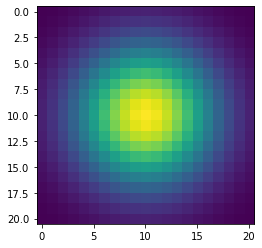

In [55]:
import matplotlib.pyplot as plt
plt.imshow(gkern(21), interpolation='none')